# Battle of the neighborhoods -- Johannesburg urban tourism analysis week4 submission

Johannesburg has great potential in developing urban tourism. 

Not only it is the capital of the Gauteng province, the most populated city in South Africa, it is also one of the metropolises in Africa. 

It offers a broad and heterogeneous range of cultural, architectural, technological, social and natural experiences and products for leisure and business (UNWTO). 

It is hard to develop urban tourism without knowing where the city stands now. So, what is the city offering now? And how can tourists find these spots?



## Part 1 Research problem/Audience/Significance 

#### Problem:  How is the urban tourism developing now in Johannesburg? How can tourists easily design their own city travel route?
#### Audience:  Gauteng Tourism Authority
#### Significance: The Gauteng Tourism Authority might benefit from a city tourism spot database and recommendation tool to provide tailor-made information services to visitors. Accurate and non-biased travel information can save the cost of travelers (Wei, 2012). A well-tested tourism spot database can provide comprehensive information inquiry services for tourists, whether they want to better understand the destination, or to pinpoint a desired venue, or to design a route.

## Part 2 Data description

This research utilised Foursquare venue database to provide non-biased tourism advices on Johannesburg for visitors.
Firstly, this research collected all the suburbs names in the city from the following websites:

http://www.sapostalcodes.info/queryPostal/Johannesburg

Then geocoding was used to covert the suburbs into geographic coordinates (like latitude and longitude) and added to the suburbs dataframe. 
By now, there is a dataframe which contains suburb name, latitude and longitude information. 

Using the coordinates as location attributes, this research then queried Foursquare venue database to collect venue information including venue name and venue category. 
This concluded the data collection. In the end the dataframe had columns of suburb name, latitude, longitude, venue, and venue categories, and was ready for analysis. 




## Part 3 Suburbs names

In [1]:

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 250)

import json
print('numpy, pandas, ..., imported...')

import requests
print('requests imported...')

from pandas.io.json import json_normalize
print('json_normalize imported...')

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")
print('matplotlib imported...')

from sklearn.cluster import DBSCAN
print('DBSCAN imported...')

numpy, pandas, ..., imported...
requests imported...
json_normalize imported...
matplotlib imported...
DBSCAN imported...


In [3]:
!conda install -c conda-forge folium=0.10.0 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.10.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.10.0              |             py_1          59 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be

In [2]:

from bs4 import BeautifulSoup
from urllib.request import urlopen  

URL = 'http://www.sapostalcodes.info/queryPostal/Johannesburg'
soup = BeautifulSoup(urlopen(URL))


In [4]:
tables = [
    [
        [td.get_text(strip=True) for td in tr.find_all('td')] 
        for tr in table.find_all('tr')
    ] 
    for table in soup.find_all('table')
]
df=pd.DataFrame(tables[1],columns=["City","Suburb","Street","Box"])

In [5]:
df.drop(columns=["Street"],inplace= True)
df.drop(df.index[0],inplace=True)
df.head(3)

City      Suburb   Box
1  JOHANNESBURG  ABBOTSFORD  2192
2  JOHANNESBURG     AEROTON  2190
3  JOHANNESBURG     AIRDLIN   N/A

In [6]:
df.shape

(1562, 3)

In [8]:
df_E=df[~df.Suburb.str.contains("EXT")]
df_U=df_E[~df_E.Suburb.str.contains("UIT")].reset_index(drop=True)
df_U.head(3)

City      Suburb   Box
0  JOHANNESBURG  ABBOTSFORD  2192
1  JOHANNESBURG     AEROTON  2190
2  JOHANNESBURG     AIRDLIN   N/A

In [9]:
df_U.shape

(519, 3)

## Part 4 Suburbs coordinates

In [10]:

from geopy.geocoders import Nominatim
def get_geo_coord(place_name):
   
    
    geo_locator = Nominatim(user_agent="mm",format_string="%s, Johannesburg Gauteng")
    
    try:
        location = geo_locator.geocode(place_name)
    except Exception:
        raise Exception("Location error")

    if not location:
        raise Exception("Location error")
    Lat=location.latitude
    Log=location.longitude

    return place_name,Lat,Log




In [11]:
d = []

for i in df_U["Suburb"]:
    try:
        place_name=i
        d.append(get_geo_coord(place_name))
    except:
        print("Hello")



Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hell

In [12]:
df_1=pd.DataFrame(d)
df_1.columns=["Suburb","Latitude","Longitude"]
df_1.head(3)

Suburb   Latitude  Longitude
0  ABBOTSFORD -26.143177  28.068441
1     AEROTON -26.254146  27.974187
2     AIRDLIN -26.026460  28.060637

In [24]:
df_1.shape

(318, 3)

## Part 5 Suburbs mapping

In [13]:
from geopy.geocoders import Nominatim

address = 'Johannesburg, Gauteng'

geolocator = Nominatim(user_agent="mm")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Johannes are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Johannes are -26.205, 28.049722.


In [14]:

map_jhb = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, suburb in zip(df_1['Latitude'], df_1['Longitude'], df_1['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jhb)  
    
map_jhb

## Part 6 Get places' information using Foursquare API 

In [15]:

suburb_name = df_1.loc[88, "Suburb"]
suburb_latitude = df_1.loc[88, "Latitude"] 
suburb_longitude = df_1.loc[88, "Longitude"] 

LIMIT = 100 
radius = 500
VERSION = "20200418"
print('Latitude and longitude values of {} are {}, {}.'.format(suburb_name, 
                                                               suburb_latitude, 
                                                               suburb_longitude))

Latitude and longitude values of ELLIS PARK are -26.1987522, 28.0588697.


In [16]:


CLIENT_ID = 'P03R0WOKJKA1ZTXCYDQ05ASLN0ELZQWIJ3DTSD0DRYJHJRCR' 
CLIENT_SECRET = 'LLEPOZTQ4C5HF4JDLRAPF3MHABRGHZ2UWUFYUCRN0RGHA3GS' 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    suburb_latitude, 
    suburb_longitude, 
    radius, 
    LIMIT)

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea6b582660a9f001b40b126'},
 'response': {'headerLocation': 'Johannesburg',
  'headerFullLocation': 'Johannesburg',
  'headerLocationGranularity': 'city',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': -26.194252195499995,
    'lng': 28.06387556508536},
   'sw': {'lat': -26.203252204500007, 'lng': 28.053863834914637}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58933c31d8f3e92fa7301d2e',
       'name': 'Hallmark House',
       'location': {'address': '54 Siemert Road',
        'lat': -26.199548362597096,
        'lng': 28.055921532287694,
        'labeledLatLngs': [{'label': 'display',
          'lat': -26.199548362597096,
          'lng': 28.055921532287694}],
        'distance': 307,
        'postalCode': '2094',
    

In [18]:


def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

name            categories
0                       Hallmark House                 Hotel
1                Emirates Airline Park               Stadium
2  Ellis Park Stadium | Coca-Cola Park           Rugby Pitch
3                       KFC Ellis Park   Fried Chicken Joint
4                                  KFC  Fast Food Restaurant

In [20]:

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
  
     
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) 
            for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue',
                  'Venue Category'
                            ]
    
    return(nearby_venues)

In [22]:
JHB_venues = getNearbyVenues(names=df_1['Suburb'],
                                   latitudes=df_1['Latitude'],
                                   longitudes=df_1['Longitude']
                                  )
JHB_venues.head()

Suburb  Suburb Latitude  Suburb Longitude                       Venue  \
0  ABBOTSFORD       -26.143177         28.068441            Tortellino D'Oro   
1  ABBOTSFORD       -26.143177         28.068441  Acro Branch Adventure Zone   
2  ABBOTSFORD       -26.143177         28.068441        Oaklands Farm Supply   
3  ABBOTSFORD       -26.143177         28.068441       Tortellini's Oaklands   
4  ABBOTSFORD       -26.143177         28.068441       Europa Gourmet Basket   

       Venue Category  
0  Italian Restaurant  
1          Playground  
2      Farmers Market  
3  Italian Restaurant  
4  Italian Restaurant

In [23]:
JHB_venues.shape

(5024, 5)

In [25]:
JHB_venues["Suburb"].nunique()

316

In [26]:
JHB_venues['Venue Category'].nunique()

232

## Part 7 Johannesburg places at a glance

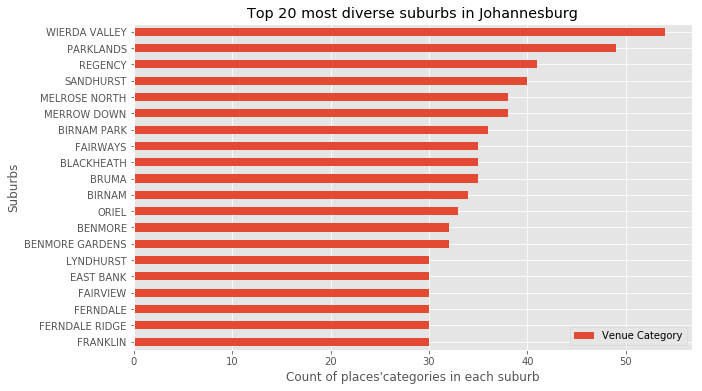

In [27]:
df_D=JHB_venues 
m=df_D.groupby('Suburb')['Venue Category'].nunique()
n=pd.DataFrame(m)
o=n.sort_values(by=['Venue Category'],ascending = False).head(20)
p=o.sort_values(by=['Venue Category'],ascending =True)
p.plot(kind="barh",figsize=(10,6))
plt.title("Top 20 most diverse suburbs in Johannesburg")
plt.xlabel("Count of places'categories in each suburb")
plt.ylabel("Suburbs")
plt.show()

In [28]:
o.index

Index(['WIERDA VALLEY', 'PARKLANDS', 'REGENCY', 'SANDHURST', 'MELROSE NORTH',
       'MERROW DOWN', 'BIRNAM PARK', 'BLACKHEATH', 'FAIRWAYS', 'BRUMA',
       'BIRNAM', 'ORIEL', 'BENMORE', 'BENMORE GARDENS', 'EAST BANK',
       'FAIRVIEW', 'FERNDALE', 'FERNDALE RIDGE', 'LYNDHURST', 'FRANKLIN'],
      dtype='object', name='Suburb')

In [34]:
jhb_busy=JHB_venues[JHB_venues['Suburb'].isin(o.index)]
jhb_busy.head()

Suburb  Suburb Latitude  Suburb Longitude                       Venue  \
217  BENMORE       -26.099657          28.04922  the Codfather Sandton Skye   
218  BENMORE       -26.099657          28.04922    Virgin Active Alice Lane   
219  BENMORE       -26.099657          28.04922              The Grillhouse   
220  BENMORE       -26.099657          28.04922                  Eatery JHB   
221  BENMORE       -26.099657          28.04922      Seattle Coffee Company   

         Venue Category  
217  Seafood Restaurant  
218                 Gym  
219          Steakhouse  
220          Restaurant  
221         Coffee Shop

In [35]:
jhb_notbusy=JHB_venues[~JHB_venues['Suburb'].isin(o.index)]
jhb_notbusy.head()

Suburb  Suburb Latitude  Suburb Longitude                       Venue  \
0  ABBOTSFORD       -26.143177         28.068441            Tortellino D'Oro   
1  ABBOTSFORD       -26.143177         28.068441  Acro Branch Adventure Zone   
2  ABBOTSFORD       -26.143177         28.068441        Oaklands Farm Supply   
3  ABBOTSFORD       -26.143177         28.068441       Tortellini's Oaklands   
4  ABBOTSFORD       -26.143177         28.068441       Europa Gourmet Basket   

       Venue Category  
0  Italian Restaurant  
1          Playground  
2      Farmers Market  
3  Italian Restaurant  
4  Italian Restaurant

In [36]:

map_jhb_busy = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, suburb in zip(jhb_busy['Suburb Latitude'], jhb_busy['Suburb Longitude'], jhb_busy['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jhb_busy)  
    
for lat, lng, suburb in zip(jhb_notbusy['Suburb Latitude'], jhb_notbusy['Suburb Longitude'], jhb_notbusy['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jhb_busy)  
    
map_jhb_busy

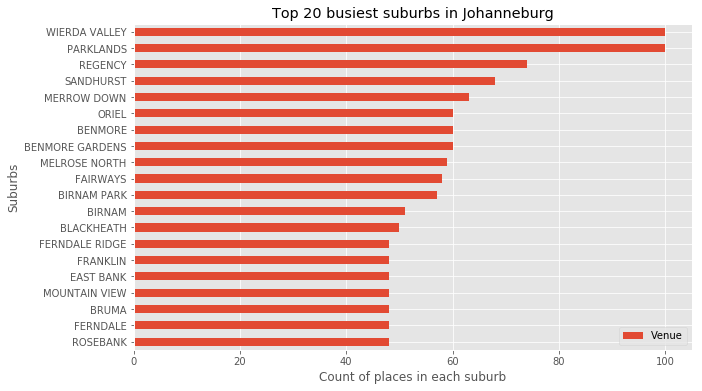

In [32]:
df_B=JHB_venues.groupby(by='Suburb').agg('count').sort_values(by=["Venue"],ascending=False)
df_B1=df_B.head(20)
q=df_B1[["Venue"]].sort_values(by=['Venue'],ascending =True)
q.plot(kind="barh",figsize=(10,6))
plt.title("Top 20 busiest suburbs in Johanneburg")
plt.xlabel("Count of places in each suburb")
plt.ylabel("Suburbs")
plt.show()

In [33]:
q.index

Index(['ROSEBANK', 'FERNDALE', 'BRUMA', 'MOUNTAIN VIEW', 'EAST BANK',
       'FRANKLIN', 'FERNDALE RIDGE', 'BLACKHEATH', 'BIRNAM', 'BIRNAM PARK',
       'FAIRWAYS', 'MELROSE NORTH', 'BENMORE GARDENS', 'BENMORE', 'ORIEL',
       'MERROW DOWN', 'SANDHURST', 'REGENCY', 'PARKLANDS', 'WIERDA VALLEY'],
      dtype='object', name='Suburb')

In [37]:
jhb_div=JHB_venues[JHB_venues['Suburb'].isin(q.index)]
jhb_div.head()

Suburb  Suburb Latitude  Suburb Longitude                       Venue  \
217  BENMORE       -26.099657          28.04922  the Codfather Sandton Skye   
218  BENMORE       -26.099657          28.04922    Virgin Active Alice Lane   
219  BENMORE       -26.099657          28.04922              The Grillhouse   
220  BENMORE       -26.099657          28.04922                  Eatery JHB   
221  BENMORE       -26.099657          28.04922      Seattle Coffee Company   

         Venue Category  
217  Seafood Restaurant  
218                 Gym  
219          Steakhouse  
220          Restaurant  
221         Coffee Shop

In [38]:
map_jhb_div = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, suburb in zip(jhb_div['Suburb Latitude'], jhb_div['Suburb Longitude'], jhb_div['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jhb_div)  
    
map_jhb_div

Text(0, 0.5, 'Categories')

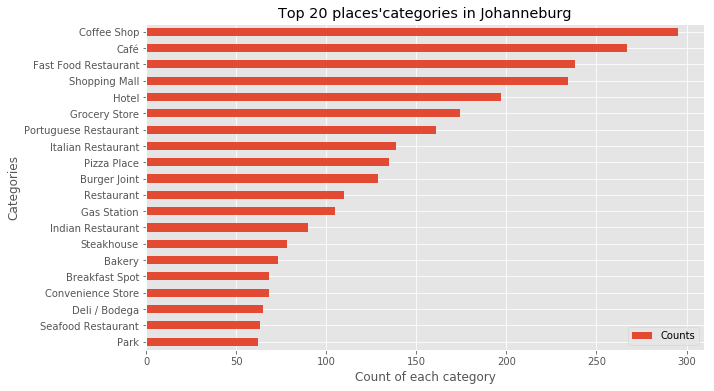

In [39]:
JHB_VC=JHB_venues.groupby(["Venue Category"]).Suburb.agg("count").to_frame("Counts").reset_index()
JHB_VC_plt=JHB_VC.sort_values(by=['Counts'],ascending=False).reset_index().head(20)
JHB_VC_plt.drop(["index"],axis=1,inplace=True)
a=JHB_VC_plt.sort_values(by=["Counts"],ascending=True)
b=a.set_index(["Venue Category"])
b.plot(kind="barh",figsize=(10,6))
plt.title("Top 20 places'categories in Johanneburg")
plt.xlabel("Count of each category")
plt.ylabel("Categories")

In [40]:
df_m = pd.merge(JHB_venues, JHB_VC, how='left', left_on = 'Venue Category', right_on = 'Venue Category')
df_m.sort_values(by=['Counts'],ascending=False).reset_index().head(200)


index                     Suburb  Suburb Latitude  Suburb Longitude  \
0      820             BRYANSTON EAST       -26.051389         28.028056   
1     4623                   VICTORIA       -26.143066         28.113218   
2     2035               HOUGHTON EST       -26.158333         28.057222   
3     2398                   LOMBARDY       -26.206563         28.042662   
4     2026               HOUGHTON EST       -26.158333         28.057222   
5     1179                    DUNKELD       -26.135833         28.041111   
6     4835              WIERDA VALLEY       -26.113009         28.057337   
7     1182                    DUNKELD       -26.135833         28.041111   
8     3769                   RANDPARK       -26.111111         27.971667   
9      327            BENMORE GARDENS       -26.099657         28.049220   
10     325            BENMORE GARDENS       -26.099657         28.049220   
11    2000                   HOUGHTON       -26.165434         28.074029   
12    3782                    REGENCY       -26.143542         28.043324   
13    4851              WIERDA VALLEY       -26.113009         28.057337   
14    3309                   ORCHARDS       -26.154722         28.079444   
15     630               BRAAMFONTEIN       -26.192321         28.036198   
16    3785                    REGENCY       -26.143542         28.043324   
17    1208                   DUXBERRY       -26.072778         28.052222   
18    1987             HOMESTEAD PARK       -26.202222         27.996944   
19    3788                    REGENCY       -26.143542         28.043324   
20    1222                  EAST BANK       -26.205000         28.049722   
21    1227                  EAST BANK       -26.205000         28.049722   
22    1962            HIGHLANDS NORTH       -26.142500         28.081111   
23    1159         DOORNFONTEIN NORTH       -26.194167         28.057778   
24    2395                   LOMBARDY       -26.206563         28.042662   
25    2541               MARSHALLTOWN       -26.208723         28.041702   
26     614               BRAAMFONTEIN       -26.192321         28.036198   
27    3341                      ORIEL       -26.186111         28.131389   
28    2148                                  -26.205000         28.049722   
29    1066                     CRESTA       -26.125278         27.981111   
30    4808              WIERDA VALLEY       -26.113009         28.057337   
31    1076                     CRESTA       -26.125278         27.981111   
32    2545               MARSHALLTOWN       -26.208723         28.041702   
33    2136                 JEPPESTOWN       -26.202222         28.070833   
34    2132                   JACANLEE       -26.121389         27.985556   
35     613               BRAAMFONTEIN       -26.192321         28.036198   
36    2388            LINKSFIELD WEST       -26.163611         28.101111   
37    1145               DOORNFONTEIN       -26.194167         28.057778   
38    1109            CRYSTAL GARDENS       -26.149167         28.076389   
39     370                   BERTRAMS       -26.191111         28.065556   
40    2108                     INANDA       -26.118611         28.059167   
41    2543               MARSHALLTOWN       -26.208723         28.041702   
42    2096                     ILLOVO       -26.122778         28.055278   
43     620               BRAAMFONTEIN       -26.192321         28.036198   
44    1128                  CYRILDENE       -26.173056         28.103611   
45    2080                  HYDE PARK       -26.119722         28.039722   
46    1138                 DARRENWOOD       -26.126667         27.986111   
47     298            BENMORE GARDENS       -26.099657         28.049220   
48    2402                   LOMBARDY       -26.206563         28.042662   
49     403                     BIRNAM       -26.194090         28.033321   
50    2832                MERROW DOWN       -26.133242         28.059921   
51    1914                  GRESSWOLD       -26.13388

Text(0, 0.5, 'Places')

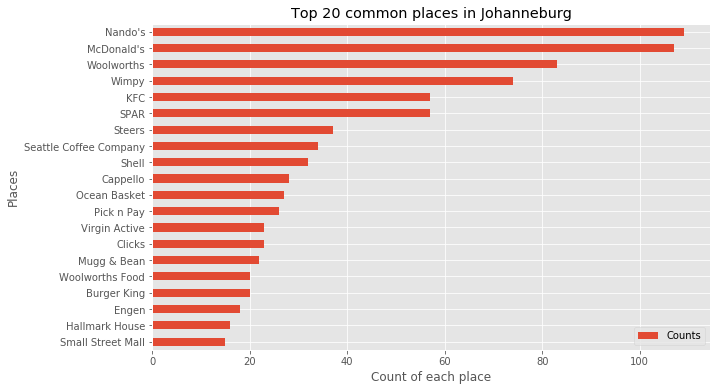

In [41]:
JHB_VC1=JHB_venues.groupby(["Venue"]).Suburb.agg("count").to_frame("Counts").reset_index()
JHB_VC1_plt=JHB_VC1.sort_values(by=['Counts'],ascending=False).reset_index().head(20)
JHB_VC1_plt.drop(["index"],axis=1,inplace=True)
c=JHB_VC1_plt.sort_values(by=["Counts"],ascending=True)
d=c.set_index(["Venue"])
d.plot(kind="barh",figsize=(10,6))
plt.title("Top 20 common places in Johanneburg")
plt.xlabel("Count of each place")
plt.ylabel("Places")

In [42]:
df_m1 = pd.merge(JHB_venues, JHB_VC1, how='left', left_on = 'Venue', right_on = 'Venue')
df_m1.sort_values(by=['Counts'],ascending=False).reset_index().head(200)

index                     Suburb  Suburb Latitude  Suburb Longitude  \
0     2161                                  -26.205000         28.049722   
1      739                      BRUMA       -26.176667         28.108333   
2     1205                    DUNKELD       -26.135833         28.041111   
3     1657                   FRANKLIN       -26.205000         28.049722   
4     3940                   RISIDALE       -26.137500         27.979722   
5      108              AUCKLAND PARK       -26.186944         28.005000   
6     2676            MELROSE GARDENS       -26.149167         28.076389   
7     4722                 WESTCLIFFE       -26.205000         28.049722   
8     4522                    TOWERBY       -26.255833         28.046111   
9     4716                 WESTCLIFFE       -26.205000         28.049722   
10    4526                  TOWNSVIEW       -26.257500         28.054444   
11    2747              MELROSE NORTH       -26.134167         28.064167   
12     752                      BRUMA       -26.176667         28.108333   
13    1607                  FORDSBURG       -26.205556         28.022222   
14    4956                       WITS       -26.187098         28.029904   
15    2762              MELROSE-NOORD       -26.197690         28.049385   
16    4962                       WITS       -26.187098         28.029904   
17    2631              MAYFAIR SOUTH       -26.205000         28.014167   
18    3475                  PARKLANDS       -26.146634         28.036803   
19    2608              MAYFAIR NORTH       -26.205000         28.014167   
20    2585                    MAYFAIR       -26.205000         28.014167   
21     373                   BERTRAMS       -26.191111         28.065556   
22     714                    BROMHOF       -26.087500         27.964722   
23    3503                  PARKLANDS       -26.146634         28.036803   
24    1690                GARDEN VIEW       -26.149167         28.076389   
25    2558               MARSHALLTOWN       -26.208723         28.041702   
26    2553               MARSHALLTOWN       -26.208723         28.041702   
27    1733                   GLENANDA       -26.272222         28.037500   
28    3546                   PARKTOWN       -26.181667         28.027778   
29    4869                    WINDSOR       -26.271355         28.034211   
30    1753             GLENANDA NORTH       -26.272222         28.037500   
31    3568             PARKTOWN NORTH       -26.139444         28.030278   
32    4228                  SAVOY EST       -26.129444         28.079167   
33    2763              MELROSE-NOORD       -26.197690         28.049385   
34    1235                  EAST BANK       -26.205000         28.049722   
35     312            BENMORE GARDENS       -26.099657         28.049220   
36    3230                    OAKDENE       -26.263611         28.052500   
37    4100                   ROSEBANK       -26.205000         28.049722   
38     875             CARLTON CENTRE       -26.205404         28.047024   
39    4106                   ROSEBANK       -26.205000         28.049722   
40     870             CARLTON CENTRE       -26.205404         28.047024   
41    3121                    NEWTOWN       -26.203997         28.034003   
42    4561                 TROYEVILLE       -26.199019         28.065564   
43    1296                   EASTGATE       -26.179930         28.116648   
44    3178                 NORTHCLIFF       -26.131111         27.962222   
45    1411                   FAIRVIEW       -26.205000         28.049722   
46    1417                   FAIRVIEW       -26.205000         28.049722   
47    3212                    NORWOOD       -26.158889         28.072500   
48    4133              ROSETTENVILLE       -26.245278         28.058056   
49    1293                   EASTGATE       -26.179930         28.116648   
50     902                CHELTONDALE       -26.152329         28.080837   
51    3027              MOUNTAIN VIEW       -26.19673

In [187]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
def get_ratio(row):
    name = row['Venue Category']
    return fuzz.partial_ratio(name, "Park")

Park =JHB_venues[JHB_venues.apply(get_ratio, axis=1) > 90]

In [189]:
def get_ratio(row):
    name = row['Venue Category']
    return fuzz.partial_ratio(name, "Golf")

Golf = JHB_venues[JHB_venues.apply(get_ratio, axis=1) > 60]

In [191]:
def get_ratio(row):
    name = row['Venue Category']
    return fuzz.partial_ratio(name, "Trail Zoo")

Trail = JHB_venues[JHB_venues.apply(get_ratio, axis=1) > 80]


In [193]:
map_jhb_outdoor = folium.Map(location=[latitude, longitude], zoom_start=11)
Outdoor=[Park, Golf, Trail]
Outdoor_result = pd.concat(Outdoor)
for lat, lng, suburb in zip(Outdoor_result['Suburb Latitude'], Outdoor_result['Suburb Longitude'], Outdoor_result['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jhb_outdoor)
    
map_jhb_outdoor

## Part 8 Top 10 categories of each suburb

In [43]:

JHB_onehot = pd.get_dummies(JHB_venues[['Venue Category']], prefix="", prefix_sep="")

JHB_onehot['Suburb'] = JHB_venues['Suburb'] 

JHB_onehot.head(3)

ATM  Accessories Store  African Restaurant  Airport Terminal  \
0    0                  0                   0                 0   
1    0                  0                   0                 0   
2    0                  0                   0                 0   

   American Restaurant  Arcade  Argentinian Restaurant  Art Gallery  \
0                    0       0                       0            0   
1                    0       0                       0            0   
2                    0       0                       0            0   

   Art Museum  Arts & Crafts Store  ...  Train Station  Turkish Restaurant  \
0           0                    0  ...              0                   0   
1           0                    0  ...              0                   0   
2           0                    0  ...              0                   0   

   Vegetarian / Vegan Restaurant  Video Store  Warehouse Store  Whisky Bar  \
0                              0            0                0           0   
1                              0            0                0           0   
2                              0            0                0           0   

   Wine Bar  Yoga Studio  Zoo      Suburb  
0         0            0    0  ABBOTSFORD  
1         0            0    0  ABBOTSFORD  
2         0            0    0  ABBOTSFORD  

[3 rows x 233 columns]

In [45]:

JHB_grouped = JHB_onehot.groupby('Suburb').mean().reset_index()
JHB_grouped.head(3)

Suburb  ATM  Accessories Store  African Restaurant  Airport Terminal  \
0              0.0                0.0                 0.0               0.0   
1  ABBOTSFORD  0.0                0.0                 0.0               0.0   
2     AEROTON  0.0                0.0                 0.0               0.0   

   American Restaurant  Arcade  Argentinian Restaurant  Art Gallery  \
0                  0.0     0.0                     0.0     0.041667   
1                  0.0     0.0                     0.0     0.000000   
2                  0.0     0.0                     0.0     0.000000   

   Art Museum  ...  Trail  Train Station  Turkish Restaurant  \
0         0.0  ...    0.0            0.0                 0.0   
1         0.0  ...    0.0            0.0                 0.0   
2         0.0  ...    0.0            0.0                 0.0   

   Vegetarian / Vegan Restaurant  Video Store  Warehouse Store  Whisky Bar  \
0                            0.0          0.0              0.0         0.0   
1                            0.0          0.0              0.0         0.0   
2                            0.0          0.0              0.0         0.0   

   Wine Bar  Yoga Studio  Zoo  
0       0.0          0.0  0.0  
1       0.0          0.0  0.0  
2       0.0          0.0  0.0  

[3 rows x 233 columns]

In [46]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
 
num_top_venues = 10



columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Suburb'] = JHB_grouped['Suburb']

for ind in np.arange(JHB_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(JHB_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Suburb 1th Most Common Venue 2th Most Common Venue  \
0                              Café  Fast Food Restaurant   
1  ABBOTSFORD    Italian Restaurant        Clothing Store   
2     AEROTON          Soccer Field           Gas Station   
3     AIRDLIN           Supermarket                   Gym   
4  ALAN MANOR     Convenience Store                   Spa   

   3th Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Portuguese Restaurant         Shopping Mall           Coffee Shop   
1            Pizza Place        Farmers Market    Mexican Restaurant   
2                   Park                   Zoo    Falafel Restaurant   
3   Fast Food Restaurant         Shopping Mall          Burger Joint   
4                    Zoo  Ethiopian Restaurant     Food & Drink Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Breakfast Spot                 Hotel    Mexican Restaurant   
1          Soccer Field            Playground           Flea Market   
2     Food & Drink Shop                  Food           Flower Shop   
3     Indian Restaurant    Seafood Restaurant            Restaurant   
4                  Food           Flower Shop           Flea Market   

      9th Most Common Venue 10th Most Common Venue  
0             Historic Site            Art Gallery  
1               Flower Shop   Ethiopian Restaurant  
2               Flea Market            Fish Market  
3  Mediterranean Restaurant            Coffee Shop  
4               Fish Market      Fish & Chips Shop

## Part 9 DBSCAN Clustering

In [48]:

JHB_grouped_clustering = JHB_grouped.drop('Suburb', 1)

In [169]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.35, min_samples=4).fit(JHB_grouped_clustering)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
JHB_grouped_clustering["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [58]:
neighborhoods_venues_sorted.insert(0, 'Clus_Db', db.labels_)

ValueError: cannot insert Clus_Db, already exists

In [170]:
JHB_merged =df_1.join(neighborhoods_venues_sorted.set_index('Suburb'), on='Suburb')

In [171]:
NOISE=JHB_merged.loc[JHB_merged['Clus_Db'] == -1]
NOISE.shape

(210, 14)

In [172]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 0]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
18          BEDFORDVIEW -26.176389  28.142500      0.0           Pizza Place   
25              BENMORE -26.099657  28.049220      0.0                 Hotel   
26      BENMORE GARDENS -26.099657  28.049220      0.0                 Hotel   
35               BIRNAM -26.194090  28.033321      0.0           Coffee Shop   
36          BIRNAM PARK -26.129722  28.068333      0.0                 Hotel   
37           BLACKHEATH -26.134444  27.974167      0.0                  Café   
44         BRAAMFONTEIN -26.192321  28.036198      0.0           Coffee Shop   
52                BRUMA -26.176667  28.108333      0.0    Chinese Restaurant   
57       CARLTON CENTRE -26.205404  28.047024      0.0           Coffee Shop   
58          CHELTONDALE -26.152329  28.080837      0.0           Flea Market   
66            CRAIGAVON -26.021266  27.994186      0.0    Italian Restaurant   
67            CRAIGHALL -26.126389  28.023333      0.0    Italian Restaurant   
68       CRAIGHALL PARK -26.126389  28.023333      0.0    Italian Restaurant   
69               CRESTA -26.125278  27.981111      0.0                  Café   
74      CRYSTAL GARDENS -26.149167  28.076389      0.0     Food & Drink Shop   
79              DUNKELD -26.135833  28.041111      0.0                 Hotel   
82            EAST BANK -26.205000  28.049722      0.0                  Café   
84             EASTGATE -26.179930  28.116648      0.0      Department Store   
88           ELLIS PARK -26.198752  28.058870      0.0                 Hotel   
93             FAIRVIEW -26.205000  28.049722      0.0                  Café   
94             FAIRWAYS -26.188640  28.117920      0.0           Coffee Shop   
95             FERNDALE -26.205000  28.049722      0.0                  Café   
96       FERNDALE RIDGE -26.205000  28.049722      0.0                  Café   
100            FRANKLIN -26.205000  28.049722      0.0                  Café   
101         GARDEN VIEW -26.149167  28.076389      0.0     Food & Drink Shop   
122            HOUGHTON -26.165434  28.074029      0.0    Italian Restaurant   
126           HYDE PARK -26.119722  28.039722      0.0                 Hotel   
134                     -26.205000  28.049722      0.0                  Café   
158            LOMBARDY -26.206563  28.042662      0.0  Fast Food Restaurant   
162           LYNDHURST -26.205000  28.049722      0.0                  Café   
166        MARSHALLTOWN -26.208723  28.041702      0.0  Fast Food Restaurant   
176     MELROSE GARDENS -26.149167  28.076389      0.0     Food & Drink Shop   
177       MELROSE NORTH -26.134167  28.064167      0.0                 Hotel   
178       MELROSE-NOORD -26.197690  28.049385      0.0  Fast Food Restaurant   
180         MERROW DOWN -26.133242  28.059921      0.0                 Hotel   
181  MODDERFONTEIN SIHS -26.121415  28.136025      0.0          Burger Joint   
186            MONTROUX -26.141667  27.984444      0.0           Coffee Shop   
188       MOUNTAIN VIEW -26.196739  28.042312      0.0  Fast Food Restaurant   
196             NEWTOWN -26.203997  28.034003      0.0           Coffee Shop   
198             NORSCOT -26.030141  27.996317      0.0           Pizza Place   
202             NORWOOD -26.158889  28.072500      0.0      Sushi Restaurant   
209            ORCHARDS -26.154722  28.079444      0.0  Fast Food Restaurant   
210               ORIEL -26.186111  28.131389      0.0           Coffee Shop   
215           PARKHURST -26.139722  28.018889      0.0           Coffee Shop   
216           PARKLANDS -26.146634  28.036803      0.0                 Hotel   
219      PARKTOWN NORTH -26.139444  28.030278      0.0           Coffee Shop   
222            PARKWOOD -26.150833  28.030278      0.0                  Café   
233             REGENCY -26.143542  28.043324      0.0                 Hotel   
241            RISIDALE -26.137500  27.979722      0.0                  Café   
252            RO

In [173]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 1]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
15    BASSONIA -26.275556  28.061111      1.0                 Trail   
16  BASSONIA 1 -26.275556  28.061111      1.0                 Trail   
17  BASSONIA 2 -26.275556  28.061111      1.0                 Trail   

   2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
15         Shopping Mall           Golf Course   Japanese Restaurant   
16         Shopping Mall           Golf Course   Japanese Restaurant   
17         Shopping Mall           Golf Course   Japanese Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
15            Steakhouse    Chinese Restaurant           Pizza Place   
16            Steakhouse    Chinese Restaurant           Pizza Place   
17            Steakhouse    Chinese Restaurant           Pizza Place   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
15           Fish Market           Flea Market            Flower Shop  
16           Fish Market           Flea Market            Flower Shop  
17           Fish Market           Flea Market            Flower Shop

In [174]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 2]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
22          BELLEVUE -26.177222      28.07      2.0          Burger Joint   
23  BELLEVUE CENTRAL -26.177222      28.07      2.0          Burger Joint   
24     BELLEVUE EAST -26.177222      28.07      2.0          Burger Joint   

   2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
22         Grocery Store                   Spa                 Hotel   
23         Grocery Store                   Spa                 Hotel   
24         Grocery Store                   Spa                 Hotel   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
22           Flower Shop           Flea Market           Gas Station   
23           Flower Shop           Flea Market           Gas Station   
24           Flower Shop           Flea Market           Gas Station   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
22  Fast Food Restaurant           Golf Course                   Food  
23  Fast Food Restaurant           Golf Course                   Food  
24  Fast Food Restaurant           Golf Course                   Food

In [175]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 3]

Suburb   Latitude  Longitude  Clus_Db  \
40   BOOYSENS RESERVE -26.230833  28.012222      3.0   
109    GOLD REEF CITY -26.237057  28.010009      3.0   
247        ROBERTSHAM -26.242778  28.016389      3.0   

            1th Most Common Venue         2th Most Common Venue  \
40                     Theme Park  Theme Park Ride / Attraction   
109  Theme Park Ride / Attraction          Fast Food Restaurant   
247                    Theme Park  Theme Park Ride / Attraction   

    3th Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
40             Restaurant            Steakhouse  Fast Food Restaurant   
109            Theme Park            Restaurant        Ice Cream Shop   
247                 Hotel            Restaurant          Burger Joint   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
40           Cocktail Bar             BBQ Joint          Burger Joint   
109         Movie Theater    Seafood Restaurant             Multiplex   
247  Fast Food Restaurant                  Café    Seafood Restaurant   

    9th Most Common Venue 10th Most Common Venue  
40                 Casino                Theater  
109                  Café                 Casino  
247                Casino           Cocktail Bar

In [176]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 4]

Suburb   Latitude  Longitude  Clus_Db  1th Most Common Venue  \
45         BRAMLEY -26.124722  28.078889      4.0  Portuguese Restaurant   
47   BRAMLEY MANOR -26.124722  28.078889      4.0  Portuguese Restaurant   
257      SAVOY EST -26.129444  28.079167      4.0  Portuguese Restaurant   

    2th Most Common Venue 3th Most Common Venue   4th Most Common Venue  \
45          Grocery Store     Convenience Store                    Road   
47          Grocery Store     Convenience Store                    Road   
257    Italian Restaurant   Fried Chicken Joint  Furniture / Home Store   

    5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
45    Sporting Goods Shop  Furniture / Home Store                Garden   
47    Sporting Goods Shop  Furniture / Home Store                Garden   
257                Garden           Grocery Store          Liquor Store   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
45     Miscellaneous Shop          Liquor Store    Fried Chicken Joint  
47     Miscellaneous Shop          Liquor Store    Fried Chicken Joint  
257   Sporting Goods Shop          Dessert Shop   Fast Food Restaurant

In [177]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 5]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
53        BRYANSTON -26.051389  28.028056      5.0                  Café   
54   BRYANSTON EAST -26.051389  28.028056      5.0                  Café   
55  BRYANSTON MANOR -26.051389  28.028056      5.0                  Café   

   2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
53           Supermarket              Pharmacy    Seafood Restaurant   
54           Supermarket              Pharmacy    Seafood Restaurant   
55           Supermarket              Pharmacy    Seafood Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
53          Dessert Shop           Pizza Place         Grocery Store   
54          Dessert Shop           Pizza Place         Grocery Store   
55          Dessert Shop           Pizza Place         Grocery Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
53         Shopping Mall     French Restaurant         Farmers Market  
54         Shopping Mall     French Restaurant         Farmers Market  
55         Shopping Mall     French Restaurant         Farmers Market

In [178]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 6]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
65       COTTESLOE -26.186359  28.018572      6.0         Deli / Bodega   
218       PARKTOWN -26.181667  28.027778      6.0         Deli / Bodega   
220  PARKTOWN WEST -26.181667  28.027778      6.0         Deli / Bodega   

    2th Most Common Venue  3th Most Common Venue 4th Most Common Venue  \
65            Coffee Shop            Golf Course                 Hotel   
218           Coffee Shop  Portuguese Restaurant    Athletics & Sports   
220           Coffee Shop  Portuguese Restaurant    Athletics & Sports   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
65             Restaurant          Burger Joint         Movie Theater   
218    Italian Restaurant                   Gym           Gas Station   
220    Italian Restaurant                   Gym           Gas Station   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
65                   Café                Bakery                    Gym  
218            Food Court           Planetarium             Restaurant  
220            Food Court           Planetarium             Restaurant

In [179]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 7]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
77         DOORNFONTEIN -26.194167  28.057778      7.0  Fast Food Restaurant   
78   DOORNFONTEIN NORTH -26.194167  28.057778      7.0  Fast Food Restaurant   
193    NEW DOORNFONTEIN -26.194167  28.057778      7.0  Fast Food Restaurant   

    2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
77                   Park                 Hotel   Fried Chicken Joint   
78                   Park                 Hotel   Fried Chicken Joint   
193                  Park                 Hotel   Fried Chicken Joint   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
77                Stadium           Supermarket           Gas Station   
78                Stadium           Supermarket           Gas Station   
193               Stadium           Supermarket           Gas Station   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
77            Coffee Shop           Rugby Pitch      Convenience Store  
78            Coffee Shop           Rugby Pitch      Convenience Store  
193           Coffee Shop           Rugby Pitch      Convenience Store

In [180]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 8]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
91         FAIRMOUNT -26.143889  28.102222      8.0           Coffee Shop   
92   FAIRMOUNT RIDGE -26.143889  28.102222      8.0           Coffee Shop   
107        GLENHAZEL -26.140000  28.100833      8.0           Coffee Shop   

    2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
91          Grocery Store            Steakhouse           Supermarket   
92          Grocery Store            Steakhouse           Supermarket   
107         Grocery Store                 Hotel                Bakery   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
91                  Hotel                Bakery           Pizza Place   
92                  Hotel                Bakery           Pizza Place   
107           Pizza Place     Convenience Store         Shopping Mall   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
91      Convenience Store         Shopping Mall      Food & Drink Shop  
92      Convenience Store         Shopping Mall      Food & Drink Shop  
107           Gas Station           Supermarket             Steakhouse

In [181]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 9]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
97       FORDSBURG -26.205556  28.022222      9.0     Indian Restaurant   
168        MAYFAIR -26.205000  28.014167      9.0     Indian Restaurant   
169  MAYFAIR NORTH -26.205000  28.014167      9.0     Indian Restaurant   
170  MAYFAIR SOUTH -26.205000  28.014167      9.0     Indian Restaurant   
225        PIONEER -26.208113  28.019134      9.0     Indian Restaurant   

     2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
97   Portuguese Restaurant             Nightclub           Flea Market   
168  Portuguese Restaurant           Flea Market    Turkish Restaurant   
169  Portuguese Restaurant           Flea Market    Turkish Restaurant   
170  Portuguese Restaurant           Flea Market    Turkish Restaurant   
225  Portuguese Restaurant           Flea Market    Turkish Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
97       Asian Restaurant                Bakery    Seafood Restaurant   
168  Fast Food Restaurant                Bakery      Asian Restaurant   
169  Fast Food Restaurant                Bakery      Asian Restaurant   
170  Fast Food Restaurant                Bakery      Asian Restaurant   
225        Breakfast Spot        Clothing Store          Burger Joint   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
97      Fish & Chips Shop               Brewery         Breakfast Spot  
168        Breakfast Spot    Seafood Restaurant      Fish & Chips Shop  
169        Breakfast Spot    Seafood Restaurant      Fish & Chips Shop  
170        Breakfast Spot    Seafood Restaurant      Fish & Chips Shop  
225  Fast Food Restaurant      Asian Restaurant      Fish & Chips Shop

In [182]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 10]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
103        GILLVIEW -26.263889  28.026389     10.0         Shopping Mall   
104        GLENANDA -26.272222  28.037500     10.0         Shopping Mall   
105  GLENANDA NORTH -26.272222  28.037500     10.0         Shopping Mall   
106  GLENANDA SOUTH -26.272222  28.037500     10.0         Shopping Mall   
272      SUIDEROORD -26.272500  28.028056     10.0     Food & Drink Shop   
308         WINDSOR -26.271355  28.034211     10.0         Shopping Mall   
312     WINDSOR-WES -26.271355  28.034211     10.0         Shopping Mall   

     2th Most Common Venue  3th Most Common Venue 4th Most Common Venue  \
103  Portuguese Restaurant  Outdoors & Recreation        Breakfast Spot   
104     Chinese Restaurant     Italian Restaurant  Fast Food Restaurant   
105     Chinese Restaurant     Italian Restaurant  Fast Food Restaurant   
106     Chinese Restaurant     Italian Restaurant  Fast Food Restaurant   
272          Shopping Mall  Portuguese Restaurant                   Gym   
308  Portuguese Restaurant     Italian Restaurant                   Gym   
312  Portuguese Restaurant     Italian Restaurant                   Gym   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
103         Shop & Service  Fast Food Restaurant     Food & Drink Shop   
104  Portuguese Restaurant                   Gym           Pizza Place   
105  Portuguese Restaurant                   Gym           Pizza Place   
106  Portuguese Restaurant                   Gym           Pizza Place   
272         Breakfast Spot        Shop & Service  Fast Food Restaurant   
308            Pizza Place     Convenience Store          Dessert Shop   
312            Pizza Place     Convenience Store          Dessert Shop   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
103          Grocery Store          Burger Joint           Dessert Shop  
104               Pharmacy     Convenience Store  Outdoors & Recreation  
105               Pharmacy     Convenience Store  Outdoors & Recreation  
106               Pharmacy     Convenience Store  Outdoors & Recreation  
272        Bed & Breakfast           Gas Station            Coffee Shop  
308  Outdoors & Recreation           Coffee Shop     Chinese Restaurant  
312  Outdoors & Recreation           Coffee Shop     Chinese Restaurant

In [183]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 11]

Suburb   Latitude  Longitude  Clus_Db  \
135  JOHANNESBURG COUNTRY CLUB -26.182448  28.010450     11.0   
179                   MELVILLE -26.175163  28.010860     11.0   
238                   RICHMOND -26.181667  28.016111     11.0   

    1th Most Common Venue 2th Most Common Venue 3th Most Common Venue  \
135                  Café          Cocktail Bar          Burger Joint   
179                  Café          Cocktail Bar                   Bar   
238                  Café          Cocktail Bar                   Bar   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
135    Italian Restaurant                   Bar           Pizza Place   
179                Bistro    Italian Restaurant            Restaurant   
238           Pizza Place    African Restaurant         Deli / Bodega   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
135         Deli / Bodega    African Restaurant            Restaurant   
179    Mexican Restaurant    African Restaurant        Clothing Store   
238           Coffee Shop    Italian Restaurant   Arts & Crafts Store   

    10th Most Common Venue  
135    Arts & Crafts Store  
179   Fast Food Restaurant  
238           Burger Joint

In [184]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 12]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
174        MEGAWATT PARK -26.037500  28.086389     12.0         Grocery Store   
276          SUNNINGHILL -26.035278  28.075833     12.0         Grocery Store   
277  SUNNINGHILL GARDENS -26.035278  28.075833     12.0         Grocery Store   
278     SUNNINGHILL PARK -26.035278  28.075833     12.0         Grocery Store   

    2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
174                   Spa  Fast Food Restaurant           Golf Course   
276                   Spa         Deli / Bodega                Lounge   
277                   Spa         Deli / Bodega                Lounge   
278                   Spa         Deli / Bodega                Lounge   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
174     Convenience Store     Indian Restaurant           Pizza Place   
276  Fast Food Restaurant      Sushi Restaurant         Shopping Mall   
277  Fast Food Restaurant      Sushi Restaurant         Shopping Mall   
278  Fast Food Restaurant      Sushi Restaurant         Shopping Mall   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
174                Lounge         Deli / Bodega          Shopping Mall  
276           Pizza Place     Indian Restaurant      Convenience Store  
277           Pizza Place     Indian Restaurant      Convenience Store  
278           Pizza Place     Indian Restaurant      Convenience Store

In [185]:
JHB_merged.loc[JHB_merged['Clus_Db'] == 13]

Suburb   Latitude  Longitude  Clus_Db 1th Most Common Venue  \
187            MORET -26.103889  27.984444     13.0         Grocery Store   
227  PRESIDENT RIDGE -26.102778  27.989444     13.0         Grocery Store   
230         RANDPARK -26.111111  27.971667     13.0         Shopping Mall   
249      ROBIN HILLS -26.111667  27.982222     13.0           Pizza Place   

    2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
187  Fast Food Restaurant         Shopping Mall    Seafood Restaurant   
227      Toy / Game Store                   Spa    Seafood Restaurant   
230         Grocery Store           Golf Course           Pizza Place   
249         Grocery Store    Rock Climbing Spot  Gym / Fitness Center   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
187                   Spa  Gym / Fitness Center    Rock Climbing Spot   
227               Butcher  Fast Food Restaurant            Restaurant   
230              Pharmacy                 Hotel           Video Store   
249              Pharmacy           Video Store         Deli / Bodega   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
187            Restaurant           Gas Station                 Bakery  
227                Bakery          Burger Joint     Athletics & Sports  
230    Rock Climbing Spot  Fast Food Restaurant          Deli / Bodega  
249    Seafood Restaurant         Shopping Mall   Fast Food Restaurant